In [1]:
import os
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.random.set_seed(42)

# fix bug for the correct use of Conv2D layers
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

from helpers import normalize_img, mask_to_categorical
from model_setup import training_fit_loop
from config_loader import Config

### Defining the model

In [3]:
base_model = tf.keras.applications.resnet50.ResNet50(include_top=False, weights=None)

inputs = tf.keras.layers.Input(shape=(32, 32, 3), name="input_layer")
x = base_model(inputs)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax",
                               name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

2022-07-19 13:24:49.296119: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-19 13:24:49.302020: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-07-19 13:24:49.303589: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2022-07-19 13:24:49.303651: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-07-19 13:24:49.303682: I tensorflow/stream_executor/platform/def

### Training

Epoch 1/120


2022-07-19 13:24:54.919871: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-07-19 13:24:54.948372: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz
2022-07-19 13:24:56.164095: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-07-19 13:24:56.719808: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7


63/63 [==============================] - 12s 75ms/step - loss: 3.2364 - accuracy: 0.1842 - val_loss: 2.4174 - val_accuracy: 0.1034
Epoch 2/120
63/63 [==============================] - 3s 47ms/step - loss: 1.8830 - accuracy: 0.3475 - val_loss: 2.7393 - val_accuracy: 0.1034
Epoch 3/120
63/63 [==============================] - 3s 47ms/step - loss: 1.5890 - accuracy: 0.4641 - val_loss: 3.0074 - val_accuracy: 0.1130
Epoch 4/120
63/63 [==============================] - 3s 49ms/step - loss: 1.3928 - accuracy: 0.5423 - val_loss: 3.4181 - val_accuracy: 0.1218
Epoch 5/120
63/63 [==============================] - 3s 48ms/step - loss: 1.2712 - accuracy: 0.5711 - val_loss: 2.9716 - val_accuracy: 0.1626
Epoch 6/120
63/63 [==============================] - 3s 49ms/step - loss: 1.3571 - accuracy: 0.5875 - val_loss: 2.7504 - val_accuracy: 0.1978
Epoch 7/120
63/63 [==============================] - 3s 50ms/step - loss: 1.0015 - accuracy: 0.6924 - val_loss: 10.7488 - val_accuracy: 0.2504
Epoch 8/120
63/6

63/63 [==============================] - 3s 49ms/step - loss: 0.4187 - accuracy: 0.8948 - val_loss: 27.3003 - val_accuracy: 0.2664
Epoch 116/120
63/63 [==============================] - 3s 49ms/step - loss: 1.0802 - accuracy: 0.6475 - val_loss: 2.6115 - val_accuracy: 0.4554
Epoch 117/120
63/63 [==============================] - 3s 49ms/step - loss: 0.5077 - accuracy: 0.8421 - val_loss: 2.0114 - val_accuracy: 0.4758
Epoch 118/120
63/63 [==============================] - 3s 49ms/step - loss: 0.3193 - accuracy: 0.9247 - val_loss: 2.3320 - val_accuracy: 0.5018
Epoch 119/120
63/63 [==============================] - 3s 49ms/step - loss: 0.3336 - accuracy: 0.9341 - val_loss: 2.2688 - val_accuracy: 0.5176
Epoch 120/120
40/40 [==============================] - 0s 9ms/step - loss: 2.4514 - accuracy: 0.5058
Epoch 1/96
79/79 [==============================] - 9s 60ms/step - loss: 3.0627 - accuracy: 0.2031 - val_loss: 2.7443 - val_accuracy: 0.0956
Epoch 2/96
79/79 [==============================] -

94/94 [==============================] - 4s 46ms/step - loss: 1.3071 - accuracy: 0.5678 - val_loss: 42803172.0000 - val_accuracy: 0.1040
Epoch 14/80
94/94 [==============================] - 4s 45ms/step - loss: 2.0619 - accuracy: 0.2922 - val_loss: 42.6296 - val_accuracy: 0.1590
Epoch 15/80
94/94 [==============================] - 4s 44ms/step - loss: 1.7207 - accuracy: 0.4177 - val_loss: 3.0206 - val_accuracy: 0.3418
Epoch 16/80
94/94 [==============================] - 4s 45ms/step - loss: 1.6148 - accuracy: 0.4521 - val_loss: 1.6461 - val_accuracy: 0.3906
Epoch 17/80
94/94 [==============================] - 4s 45ms/step - loss: 1.3924 - accuracy: 0.5115 - val_loss: 1.5607 - val_accuracy: 0.4430
Epoch 18/80
94/94 [==============================] - 4s 44ms/step - loss: 1.2274 - accuracy: 0.5760 - val_loss: 1.7270 - val_accuracy: 0.4214
Epoch 19/80
94/94 [==============================] - 4s 45ms/step - loss: 1.1507 - accuracy: 0.6193 - val_loss: 1.7364 - val_accuracy: 0.4332
Epoch 20/8

110/110 [==============================] - 5s 43ms/step - loss: 0.1896 - accuracy: 0.9390 - val_loss: 3.5260 - val_accuracy: 0.5290
Epoch 47/68
110/110 [==============================] - 5s 43ms/step - loss: 0.2112 - accuracy: 0.9395 - val_loss: 2.2823 - val_accuracy: 0.5608
Epoch 48/68
110/110 [==============================] - 5s 43ms/step - loss: 0.1627 - accuracy: 0.9551 - val_loss: 2.4902 - val_accuracy: 0.5574
Epoch 49/68
110/110 [==============================] - 5s 43ms/step - loss: 0.8179 - accuracy: 0.7814 - val_loss: 147.9801 - val_accuracy: 0.1764
Epoch 50/68
110/110 [==============================] - 5s 43ms/step - loss: 0.9905 - accuracy: 0.6825 - val_loss: 2.1714 - val_accuracy: 0.5036
Epoch 51/68
110/110 [==============================] - 5s 42ms/step - loss: 0.5795 - accuracy: 0.8342 - val_loss: 10.0531 - val_accuracy: 0.3896
Epoch 52/68
110/110 [==============================] - 5s 43ms/step - loss: 0.5365 - accuracy: 0.8432 - val_loss: 1.7969 - val_accuracy: 0.5574
E

141/141 [==============================] - 6s 43ms/step - loss: 0.2225 - accuracy: 0.9390 - val_loss: 2.7829 - val_accuracy: 0.4524
Epoch 31/53
141/141 [==============================] - 6s 43ms/step - loss: 0.4715 - accuracy: 0.8722 - val_loss: 2.4568 - val_accuracy: 0.4600
Epoch 32/53
141/141 [==============================] - 6s 43ms/step - loss: 0.2899 - accuracy: 0.9045 - val_loss: 2.2222 - val_accuracy: 0.5664
Epoch 33/53
141/141 [==============================] - 6s 42ms/step - loss: 0.2744 - accuracy: 0.9232 - val_loss: 4.8203 - val_accuracy: 0.2450
Epoch 34/53
141/141 [==============================] - 6s 42ms/step - loss: 0.9395 - accuracy: 0.7220 - val_loss: 38.3500 - val_accuracy: 0.1550
Epoch 35/53
141/141 [==============================] - 6s 42ms/step - loss: 0.7330 - accuracy: 0.8110 - val_loss: 2.0077 - val_accuracy: 0.5522
Epoch 36/53
141/141 [==============================] - 6s 42ms/step - loss: 0.6407 - accuracy: 0.8256 - val_loss: 65.3412 - val_accuracy: 0.4934
Ep

172/172 [==============================] - 7s 41ms/step - loss: 1.1936 - accuracy: 0.6099 - val_loss: 1.8148 - val_accuracy: 0.5414
Epoch 42/43
172/172 [==============================] - 8s 45ms/step - loss: 1.0813 - accuracy: 0.6409 - val_loss: 1.8231 - val_accuracy: 0.5154
Epoch 43/43
40/40 [==============================] - 1s 14ms/step - loss: 1.3845 - accuracy: 0.5530
Epoch 1/40
188/188 [==============================] - 14s 46ms/step - loss: 2.6773 - accuracy: 0.2480 - val_loss: 3.0846 - val_accuracy: 0.0986
Epoch 2/40
188/188 [==============================] - 8s 42ms/step - loss: 1.6166 - accuracy: 0.4339 - val_loss: 2.9498 - val_accuracy: 0.2288
Epoch 3/40
188/188 [==============================] - 8s 42ms/step - loss: 1.5000 - accuracy: 0.4906 - val_loss: 6.3394 - val_accuracy: 0.3812
Epoch 4/40
188/188 [==============================] - 8s 43ms/step - loss: 1.6507 - accuracy: 0.4570 - val_loss: 4.4869 - val_accuracy: 0.3336
Epoch 5/40
188/188 [==============================]

Epoch 14/36
204/204 [==============================] - 8s 41ms/step - loss: 1.5223 - accuracy: 0.4577 - val_loss: 1.7882 - val_accuracy: 0.4398
Epoch 15/36
204/204 [==============================] - 8s 42ms/step - loss: 1.4738 - accuracy: 0.5031 - val_loss: 1.4525 - val_accuracy: 0.4824
Epoch 16/36
204/204 [==============================] - 9s 42ms/step - loss: 1.3651 - accuracy: 0.5431 - val_loss: 431.8322 - val_accuracy: 0.2298
Epoch 17/36
204/204 [==============================] - 8s 41ms/step - loss: 1.5297 - accuracy: 0.5136 - val_loss: 2.8472 - val_accuracy: 0.3950
Epoch 18/36
204/204 [==============================] - 8s 41ms/step - loss: 1.3114 - accuracy: 0.5608 - val_loss: 1.3012 - val_accuracy: 0.5282
Epoch 19/36
204/204 [==============================] - 8s 41ms/step - loss: 1.1912 - accuracy: 0.6098 - val_loss: 1.5328 - val_accuracy: 0.5478
Epoch 20/36
204/204 [==============================] - 9s 42ms/step - loss: 1.0255 - accuracy: 0.6614 - val_loss: 6.5040 - val_accurac

250/250 [==============================] - 10s 39ms/step - loss: 1.7132 - accuracy: 0.4382 - val_loss: 1.4479 - val_accuracy: 0.4964
Epoch 24/30
250/250 [==============================] - 10s 40ms/step - loss: 1.5049 - accuracy: 0.5101 - val_loss: 1.6575 - val_accuracy: 0.4022
Epoch 25/30
250/250 [==============================] - 10s 40ms/step - loss: 1.3168 - accuracy: 0.5597 - val_loss: 1.2596 - val_accuracy: 0.5504
Epoch 26/30
250/250 [==============================] - 10s 39ms/step - loss: 1.0892 - accuracy: 0.6295 - val_loss: 22.1234 - val_accuracy: 0.4948
Epoch 27/30
250/250 [==============================] - 10s 40ms/step - loss: 1.0628 - accuracy: 0.6490 - val_loss: 1.1058 - val_accuracy: 0.6088
Epoch 28/30
250/250 [==============================] - 10s 39ms/step - loss: 0.9917 - accuracy: 0.6688 - val_loss: 1.2919 - val_accuracy: 0.5700
Epoch 29/30
250/250 [==============================] - 10s 39ms/step - loss: 1.1373 - accuracy: 0.6198 - val_loss: 1.0746 - val_accuracy: 0.6

40/40 [==============================] - 1s 12ms/step - loss: 46.2054 - accuracy: 0.5144
Epoch 1/22
329/329 [==============================] - 19s 42ms/step - loss: 2.3451 - accuracy: 0.2929 - val_loss: 3.3760 - val_accuracy: 0.1392
Epoch 2/22
329/329 [==============================] - 13s 41ms/step - loss: 1.5923 - accuracy: 0.4549 - val_loss: 273.6581 - val_accuracy: 0.1632
Epoch 3/22
329/329 [==============================] - 13s 40ms/step - loss: 1.9024 - accuracy: 0.3557 - val_loss: 1.5437 - val_accuracy: 0.4744
Epoch 4/22
329/329 [==============================] - 13s 40ms/step - loss: 1.5805 - accuracy: 0.4681 - val_loss: 1.9618 - val_accuracy: 0.3440
Epoch 5/22
329/329 [==============================] - 13s 39ms/step - loss: 1.3661 - accuracy: 0.5306 - val_loss: 48.3123 - val_accuracy: 0.2324
Epoch 6/22
329/329 [==============================] - 13s 39ms/step - loss: 1.4346 - accuracy: 0.5249 - val_loss: 1.3225 - val_accuracy: 0.5466
Epoch 7/22
329/329 [========================

Epoch 12/20
360/360 [==============================] - 14s 40ms/step - loss: 1.1029 - accuracy: 0.6201 - val_loss: 1.1620 - val_accuracy: 0.5848
Epoch 13/20
360/360 [==============================] - 14s 40ms/step - loss: 1.0577 - accuracy: 0.6386 - val_loss: 3.9741 - val_accuracy: 0.1504
Epoch 14/20
360/360 [==============================] - 14s 39ms/step - loss: 1.8507 - accuracy: 0.3948 - val_loss: 1.7800 - val_accuracy: 0.4130
Epoch 15/20
360/360 [==============================] - 14s 39ms/step - loss: 1.3316 - accuracy: 0.5375 - val_loss: 1.3123 - val_accuracy: 0.5318
Epoch 16/20
360/360 [==============================] - 14s 40ms/step - loss: 1.0917 - accuracy: 0.6193 - val_loss: 1.6056 - val_accuracy: 0.5104
Epoch 17/20
360/360 [==============================] - 15s 40ms/step - loss: 1.0682 - accuracy: 0.6314 - val_loss: 1.6886 - val_accuracy: 0.4586
Epoch 18/20
360/360 [==============================] - 14s 40ms/step - loss: 1.1100 - accuracy: 0.6086 - val_loss: 1.2568 - val_ac

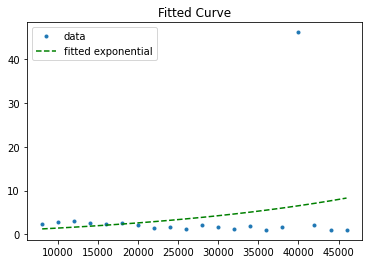

In [4]:
a = training_fit_loop(model=model_0,
                     model_params=((32, 32, 3), tf.keras.optimizers.Adam, tf.keras.losses.CategoricalCrossentropy(), ["accuracy"]),
                     data_step=2000,
                     n=20,
                     data_loading_params=("cifar10", 128, mask_to_categorical, False, False, "test"),
                     start_data=8000,
                     save_df=os.getcwd()[:-len("tests")] + "results_df/", 
                     verbose=1)

In [5]:
import pandas as pd

results = pd.read_pickle(os.getcwd()[:-len("tests")] + "results_df/07_07_2022_-16_44_06_experiment_1")
results

,R² Exp,Exp function fit,Exp: Mean power constant,Exp: Root of variance,Exp: R² value of fit,R² PL,PL function fit,PL: Mean power constant,PL: Root of variance,PL: R² value of fit
Experiment 1:,0.969349,"(1.378047389033095, 0.00013869609017929036, 0....",0.000139,0.0,0.969349,0.99362,"(1995.703846090993, 0.9116801751027342, 0.5324...",0.91168,0.0,0.99362


In [6]:
results["Exp function fit"][0]

(1.378047389033095, 0.00013869609017929036, 0.6652142013614948)

In [7]:
results["PL function fit"][0]

(1995.703846090993, 0.9116801751027342, 0.5324319887493496)

### Test without loop